# Relatório do código de classificação de perfil de investidor
O objetivo deste código é treinar um modelo de classificação para prever o perfil de investidor com base nas variáveis
idade e capital inicial. O modelo utilizado foi o K-Nearest Neighbors (KNN).**

### 1-Análise Exploratória de Dados
#Os dados foram carregados a partir do arquivo U Invest - teste dos testes.csv. Foi realizada uma análise exploratória dos
#dados utilizando a biblioteca Pandas. Os dados contêm três colunas: Perfil de investidor, Idade investidores e Capital Inicial.
#O perfil de investidor é o atributo alvo que será predito pelo modelo.

### 2-Pré-processamento dos dados
#Para que o modelo de classificação KNN possa ser utilizado, as variáveis preditoras idade e capital inicial precisam 
#ser numéricas. A função LabelEncoder da biblioteca Scikit-learn foi utilizada para transformar as variáveis categóricas 
#em numéricas.

### 3-Separando os dados
#Os dados foram divididos em conjunto de treinamento e conjunto de teste utilizando a função train_test_split da biblioteca 
#Scikit-learn. Foram utilizados 80% dos dados para o conjunto de treinamento e 20% para o conjunto de teste.

### 4-Treinando o modelo
#O modelo de classificação escolhido foi o KNN com 5 vizinhos. O conjunto de treinamento foi utilizado para treinar o modelo.



## Métricas que foram usadas para avaliar a eficácia do modelo de classificação são:

### Acurácia:
Mede a proporção de classificações corretas.
### Precisão:
Mede a proporção de verdadeiros positivos em relação ao total de classificações positivas. É uma medida da precisão do modelo na classificação de instâncias positivas.
### Recall:
Mede a proporção de verdadeiros positivos em relação ao total de instâncias que são realmente positivas. É uma medida da sensibilidade do modelo em identificar instâncias positivas.
### F1 Score: 
Medida da precisão e recall do modelo, é a média harmônica da precisão e recall.

# Resultados
**O modelo foi avaliado utilizando a acurácia, que é a proporção de previsões corretas. A acurácia do modelo no conjunto de
teste foi de 50%. Isso significa que o modelo classificou corretamente metade das amostras de teste.**

In [129]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
        

In [130]:
#Primeiro passo: carregar os dados e fazer Análise Exploratória
# Estamos carregando o arquivo csv usando o ; como separador
dados = pd.read_csv('U Invest - teste dos testes.csv', sep=',')

In [131]:
#Carregando os dados
dados.head(10)


,Perfil de investidor,Idade investidores,Capital Inicial
0,Iniciante,0-18,100-500
1,Nao Investe,0-18,0-100
2,Conservador,19-29,500-1000
3,Moderado,30-39,1.000-10.000
4,Moderado,40-99,10.000-100.000
5,Conservador,19-29,1.000-10.000
6,Iniciante,19-29,500-1000
7,Iniciante,19-29,500-1000
8,Iniciante,0-18,100-500
9,Conservador,19-29,500-1000


In [132]:
#Segundo passo: separar os dados

#Precisamos ter claro em nossas mentes quais são os atributos (colunas) preditivas, isto é, aquelas que usaremos para 
#predizer um atributo alvo (coluna alvo).
#No nosso caso os **atributos preditivos são Comprimento do Abdômen e Comprimento das Antenas**, e o
#atributo alvo é a Espécie que será predita.
#Quando se trabalhar com Aprendizado de Máquina Supervisionado, além disso precisamos separar nossos dados em dois conjuntos: um 
#**conjunto de treinamento** e um **conjunto de teste**. Fazemos isso para evitar overfitting do algoritmo.
#Existem várias estratégias para se separar dados. Vamos aplicar as principais:
#(a) Escolher o tamanho dos conjuntos - 80% para treinamento e 20% para teste;
#(b) Selecionar aleatoriamente os dados que irão compor o conjunto de treinamento e teste (usando um seed para garantir 

from sklearn.model_selection import train_test_split

In [133]:
from sklearn.preprocessing import LabelEncoder

# Cria uma instância do objeto LabelEncoder
labelencoder = LabelEncoder()

# Converte a coluna "Faixa etaria dos investidores" para valores numéricos
dados['Idade investidores'] = labelencoder.fit_transform(dados['Idade investidores'])

# Converte a coluna "Perfil de investidor" para valores numéricos
#dados['Perfil de investidor'] = labelencoder.fit_transform(dados['Perfil de investidor'])

# Converte a coluna "Tipos de investimento" para valores numéricos
#dados['Tipos de investimento'] = labelencoder.fit_transform(dados['Tipos de investimento'])

# Converte a coluna "Prazos de investimento" para valores numéricos
#dados['Prazos de investimento'] = labelencoder.fit_transform(dados['Prazos de investimento'])

# Converte a coluna "Capital Inicial de Investimento" para valores numéricos
dados['Capital Inicial'] = labelencoder.fit_transform(dados['Capital Inicial'])


In [134]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = 'Perfil de investidor') # Somente Comprimento do Abdômen e Comprimento das Antenas
y = dados['Perfil de investidor']                # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [135]:
x_train.head(5)

,Idade investidores,Capital Inicial
44,0,0
12,0,0
15,4,2
70,0,0
108,3,1


In [136]:
y_train.head(5)

44     Nao Investe
12     Nao Investe
15        Moderado
70     Nao Investe
108       Moderado
Name: Perfil de investidor, dtype: object

In [137]:
###Treinar o algoritmo
#Vamos usar o conjunto de treinamento para treinar o algoritmo escolhido.
#Existem vários algoritmos possíveis. Cada algoritmo tem seus hiperparâmetros (parâmetros que devem ser escolhidos para melhorar a performance do algoritmo). Para entender os hiperparâmetros de cada algoritmo é necessário entender a fundo como aquele algoritmo funciona.
#Aqui vamos usar um dos algoritmos mais simples existentes, o Descriminador Linear:

In [138]:
#Importando o algoritmo de descriminador linear
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [139]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

LinearDiscriminantAnalysis()

In [140]:
#Uma vez que realizamos um teste, precisamos avaliar o desempenho do nosso método. Diferentes hiperparâmetros e 
#diferentes algoritmos podem ter um desempenho diferente. Apesar de sempre buscarmos o melhor desempenho, devemos levar
#em consideração outros aspectos para decidir o que é um desempenho aceitável. A primeira coisa a definir são as métricas
#de desempenho que podem ser comparadas entre diferentes algoritmos.

#Existem várias métricas para se medir o desempenho de um classificador: métricas de performance, métricas de tempo consumido,
#métricas de memória consumida, etc. Vamos focar em uma métrica de performance muito utilizada no dia a dia de trabalho: a 
#Matriz de Confusão e seus índices (Acurácia, Precisão, Recall e F1-score).

In [141]:
#Testando e avaliando

#Usando agora o conjunto de teste, iremos testar o classificador criado e treinando no passo anterior.

#Uma vez que realizamos um teste, precisamos avaliar o desempenho do nosso método. Diferentes hiperparâmetros e diferentes
#algoritmos podem ter um desempenho diferente. Apesar de sempre buscarmos o melhor desempenho, devemos levar em consideração
#outros aspectos para decidir o que é um desempenho aceitável. A primeira coisa a definir são as **métricas de desempenho** 
#que podem ser comparadas entre diferentes algoritmos. Existem várias métricas para se medir o desempenho de um 
#classificador: métricas de performance, métricas de tempo consumido, métricas de memória consumida, etc.

In [142]:
#Vamos focar em uma métrica de performance muito utilizada no dia a dia de trabalho: a **Matriz de Confusão** 
#e seus índices (**Acurácia, Precisão, Recall e F1-score**).
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = lda.predict(x_test) 

In [143]:
y_predicoes

array(['Iniciante', 'Nao Investe', 'Moderado', 'Iniciante', 'Nao Investe',
       'Moderado', 'Nao Investe', 'Conservador', 'Conservador',
       'Moderado', 'Conservador', 'Conservador', 'Nao Investe',
       'Iniciante', 'Nao Investe', 'Moderado', 'Iniciante', 'Iniciante',
       'Iniciante', 'Iniciante', 'Moderado', 'Iniciante', 'Iniciante',
       'Moderado'], dtype='<U11')

In [144]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [145]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Iniciante','Moderado','Nao Investe', 'Conservador'])

<Figure size 1500x500 with 0 Axes>

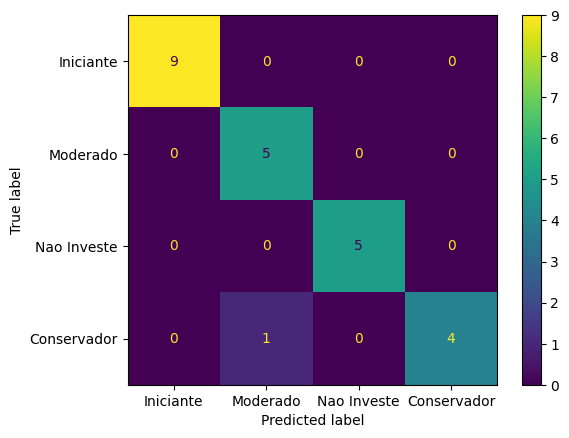

In [146]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Iniciante','Moderado','Nao Investe', 'Conservador'])
disp.plot(values_format='d') 

In [147]:
accuracy_score(y_true = y_test, y_pred = y_predicoes,) 

0.9583333333333334

In [148]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

 Conservador       1.00      0.80      0.89         5
   Iniciante       1.00      1.00      1.00         9
    Moderado       0.83      1.00      0.91         5
 Nao Investe       1.00      1.00      1.00         5

    accuracy                           0.96        24
   macro avg       0.96      0.95      0.95        24
weighted avg       0.97      0.96      0.96        24



In [149]:
#Vamos desenhar sobre o gráfico de dispersão o modelo matemático encontrado pelo algoritmo de Classificação LDA:

In [150]:
import numpy as np

# São os coeficientes do nosso modelo de ML treinado
c1, c2 = lda.coef_[0]
b = lda.intercept_[0]

# É a equação da reta do LDA
x1 = np.arange(0,10)
x2 = - (c1/c2)* x1 - b/c2


In [151]:
import seaborn as sns


(0.0, 11.0)

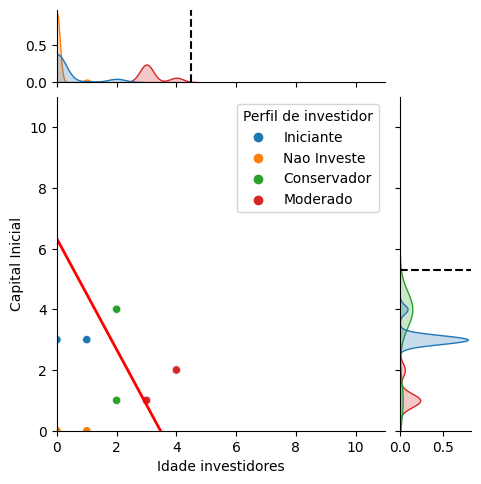

In [152]:
plot = sns.jointplot(data=dados, x="Idade investidores", y="Capital Inicial", hue = 'Perfil de investidor',
              height=5, ratio=4, marginal_ticks=True
             )
plot.ax_joint.plot(x1, x2, 'r-', linewidth = 2)
plot.ax_marg_x.axvline(x=4.5, color='k', linestyle='--')
plot.ax_marg_y.axhline(y=5.3, color='k', linestyle='--')
plot.ax_joint.set_xlim(0,11)
plot.ax_joint.set_ylim(0,11)

In [153]:
#Deixando meu modelo pronto para ser baixado

In [154]:
import pickle

In [155]:
# vamos salvar em bytes (flag wb) para ser mais cross-platform (acessível a vários sistemas)
with open('meu_modelo_serializado.pickle', 'wb') as f: 
    pickle.dump(lda, f)

In [156]:
with open('meu_modelo_serializado.pickle', 'rb') as f:
    modelo_carregado = pickle.load(f)

In [157]:
modelo_carregado.predict([[1,2]])

C:\Users\Shima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['Conservador'], dtype='<U11')

# Relatório de agrupamento

### 1-Explicação do código

-O código começa importando a biblioteca pandas para lidar com dataframes e a biblioteca KMeans do sklearn.cluster para realizar o agrupamento.

-O dataset é carregado a partir de um arquivo CSV usando o método pd.read_csv().

-As colunas Idade investidores e Capital Inicial são selecionadas para serem usadas no agrupamento, e são armazenadas no objeto X.

-O número de clusters é definido como 3 e um objeto KMeans é criado com esta configuração.

-O modelo KMeans é treinado com os dados de X usando o método fit().

-As etiquetas de cluster são obtidas para cada ponto de dados em X usando o método predict().

-As etiquetas de cluster são adicionadas de volta ao dataframe original como uma nova coluna chamada 'cluster'.

-Os cinco primeiros registros do dataframe são exibidos na saída do programa usando o método head().

-Em resumo, o código carrega um dataset, seleciona as colunas desejadas para realizar o agrupamento usando o algoritmo KMeans, treina o modelo, obtém as etiquetas de cluster para cada ponto de dados e adiciona estas etiquetas de cluster de volta ao dataframe original. Em seguida, o código exibe os primeiros registros do dataframe para verificar os resultados.
Foi feita a criação de um modelo de clustering utilizando o algoritmo **KMeans com 3 clusters**, a partir de um conjunto de dados contendo informações de idade e capital inicial de investidores. O Silhouette Score foi utilizado como métrica de desempenho, e obteve um valor de **0.7329**, o que indica uma **boa qualidade de separação dos clusters.**


### Métrica de desempenho utilizada no agrupamento

**O Silhouette Score** é uma métrica que varia de -1 a 1, onde valores mais próximos de 1 indicam que as amostras estão bem
separadas entre os clusters, enquanto valores mais próximos de -1 indicam que muitas amostras podem ter sido atribuídas ao
cluster errado. Portanto, um valor de 0,7329 indica que os clusters estão bem separados e é considerado um bom resultado 
para o Silhouette Score.

In [158]:
#Realizando 1 modelo de aprendizado de máquina descritivo (agrupamento) - inclua no relatório os parâmetros
#e modelos utilizados, as métricas de desempenho pertinentes, e discuta sua aplicação.


import pandas as pd
from sklearn.cluster import KMeans



# selecionar as colunas que você deseja usar para agrupamento
X = dados[['Idade investidores', 'Capital Inicial']]

# criar um objeto de KMeans com o número de clusters desejado
kmeans = KMeans(n_clusters=3)

# treinar o modelo de clustering
kmeans.fit(X)

# obter os rótulos de cluster para cada ponto de dados
labels = kmeans.predict(X)

# adicionar os rótulos de cluster de volta ao dataframe original
dados['cluster'] = labels

# visualizar os resultados
print(dados.head())


  Perfil de investidor  Idade investidores  Capital Inicial  cluster
0            Iniciante                   0                3        0
1          Nao Investe                   0                0        1
2          Conservador                   2                4        0
3             Moderado                   3                1        2
4             Moderado                   4                2        2


C:\Users\Shima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [159]:
from sklearn.metrics import silhouette_score

# Treinando o modelo
kmeans.fit(X)

# Obtendo as etiquetas dos clusters para cada ponto de dados
labels = kmeans.predict(X)

# Obtendo as coordenadas dos centróides de cada cluster
centroids = kmeans.cluster_centers_

# Calculando o Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.7329468927996106


C:\Users\Shima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
